# Shapely

Stand: 7. Oktober 2021

Dieses File soll euch zum einen einen kurzen Überblick über das Package Shapely verschaffen und zum anderen als Nachschlagewerk für die wichtigsten Funktionen dienen.

Die vollständige Dokumentation findet ihr unter diesem Link: [Shapely API](https://shapely.readthedocs.io/en/stable/manual.html)

## Was ist Shapely?

Shapely ist ein Python-Paket für die mengentheoretische Analyse und Manipulation von ebenen Merkmalen unter Verwendung von Funktionen aus der bekannten und weit verbreiteten GEOS-Bibliothek.

## Einführung in Shapely

Damit man Shapely verwenden kann, muss dieses Package zuerst importiert werden:

In [25]:
import shapely
from shapely.geometry import Point, MultiPoint, LineString, MultiLineString, Polygon, MultiPolygon, GeometryCollection
from shapely.ops import unary_union, cascaded_union

### Geometrie Typen

In diesem Bild werden die Geometrie-Objekte als GeoJSON Code angezeigt. Wenn man z.B. mit `fiona` ein GeoJSON einlist, können diese Geometrie-Objekte mit `Shapely` ausgelesen und manipuliert. 

<img src="img/shapely_geom.png" width="800">


**Punkte**

***Deklarierung von Punkten***

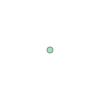

In [3]:
pt_1 = Point(15, 15)
pt_2 = Point(10, 20)

pt_1

***Einige Attributte***

Das Attribut `name` ist optional, kann aber bei gewissen Aufgaben sehr nützlich sein.

In [4]:
pt_1.name = 'First Point'
print(pt_1.name)

print(pt_1.x, pt_1.y)

print(pt_2.xy)

First Point
15.0 15.0
(array('d', [10.0]), array('d', [20.0]))


***Einige Funktionen***

In [5]:
pt_1.distance(pt_2)

7.0710678118654755

***MultiPoint***

Der Objekttyp MultiPoint ist eine Sammlung, genauer eine Liste, von Punkten.

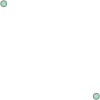

In [6]:
pt_collection = MultiPoint([pt_1, pt_2])

pt_collection

**Linien**

***Deklaration von Linien***

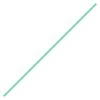

In [7]:
line = LineString([(0, 0), (1, 1)])

line

***Einige Funktionen und Attributte***

In [8]:
print(line.area)
print(line.length)

# Bounding Box
print(line.bounds)

print(line.coords)

0.0
1.4142135623730951
(0.0, 0.0, 1.0, 1.0)


***MultiLineString***

Dies ist analog zu den MultiPoints eine Liste von Linien.

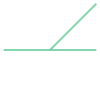

In [9]:
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)

lines

**Polygone**

***Deklaration von Polygonen***

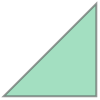

In [10]:
polygon = Polygon([(0, 0), (1, 1), (1, 0)])

polygon

***Einige Funktionen und Attributte***

In [11]:
print(polygon.area)
print(polygon.length)

# Bounding Box
print(polygon.bounds)

0.5
3.414213562373095
(0.0, 0.0, 1.0, 1.0)


***MultiPolygons***

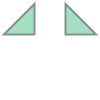

In [12]:
polygon_2 = Polygon([(2, 1), (2, 0), (3, 0)])

polygons = MultiPolygon([polygon, polygon_2])

polygons

### Räumliche Analyse Methoden

**Mengenoperationen**

<img src="img/Set-Operations.png" width="400">

In [13]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)

***Union***

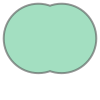

In [14]:
a.union(b)

***Intersection***

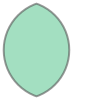

In [15]:
a.intersection(b)

***Difference***

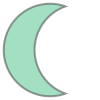

In [16]:
a.difference(b)

***Symmetric Difference***

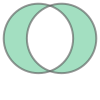

In [17]:
a.symmetric_difference(b)

***Buffer***

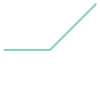

In [18]:
c = LineString([(0,0), (1,0), (2,1)])
c

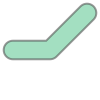

In [19]:
d = c.buffer(0.25)
d

***Cascaded Union / Unary Union***

Bei Polygonen können beide Funktionen dasselbe. `Unary Union` ist im Allgemeinen noch etwas allgemeiner d.h. diese Funktion kann auch auf Punkte oder Linien angewendet werden.

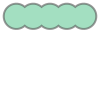

In [30]:
polygons = [Point(2*i, 0).buffer(1.5) for i in range(5)]
polygon_union = cascaded_union(polygons)
polygon_union

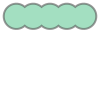

In [31]:
polygons = [Point(2*i, 0).buffer(1.5) for i in range(5)]
polygon_union = unary_union(polygons)
polygon_union